# Loading the dependecies and data


In [ ]:
%pip install tensorflow opencv-python matplotlib --break-system-packages

In [78]:
import tensorflow as tf
import os

# Loading the Data


In [83]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('data')


Found 305 files belonging to 2 classes.


In [84]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [85]:
batch[0].shape # (32, 256, 256, 3) 32 images of 256x256 pixels with 3 channels
# this was made with the default parameters of the function image_dataset_from_directory

(32, 256, 256, 3)

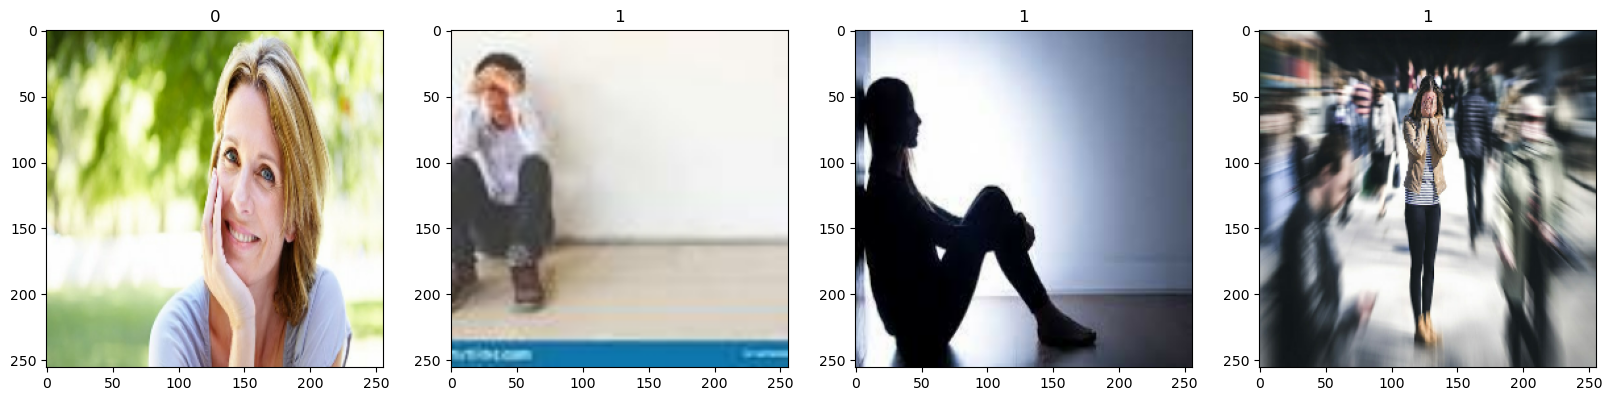

In [86]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# shows 1 = sad and 0 = happy

In [87]:
data = data.map(lambda x,y: (x/255, y)) # normalizing the data
data.as_numpy_iterator().next() # checks

(array([[[[0.21275276, 0.36569393, 0.42451745],
          [0.2144225 , 0.36736366, 0.4261872 ],
          [0.21667433, 0.3696155 , 0.42843902],
          ...,
          [0.19153924, 0.35232356, 0.43075493],
          [0.19314492, 0.35392922, 0.4323606 ],
          [0.19706649, 0.3578508 , 0.43628216]],
 
         [[0.19355085, 0.34649202, 0.40531558],
          [0.19384763, 0.3467888 , 0.40561232],
          [0.19747242, 0.3504136 , 0.40923715],
          ...,
          [0.17464001, 0.33542433, 0.40601256],
          [0.17434324, 0.33512756, 0.4057158 ],
          [0.17842817, 0.33921248, 0.4098007 ]],
 
         [[0.2       , 0.3453891 , 0.41554075],
          [0.20006196, 0.34545106, 0.4156027 ],
          [0.20392157, 0.34931067, 0.41946232],
          ...,
          [0.1729856 , 0.33376992, 0.40435815],
          [0.17886795, 0.33965227, 0.4102405 ],
          [0.1844314 , 0.3452157 , 0.41580394]],
 
         ...,
 
         [[0.33670065, 0.15630849, 0.06219085],
          [0.32352

# Data Split

In [88]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [89]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Model


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [111]:
model = Sequential()

In [112]:
model.add(Conv2D(32, (5,5), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [113]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,703,217 (14.13 MB)

 Trainable params: 3,703,217 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [115]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [116]:
hist = model.fit(train, epochs=35, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 746ms/step - accuracy: 0.5244 - loss: 1.0152 - val_accuracy: 0.5781 - val_loss: 0.6947
Epoch 2/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 713ms/step - accuracy: 0.5151 - loss: 0.7000 - val_accuracy: 0.5312 - val_loss: 0.6975
Epoch 3/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 706ms/step - accuracy: 0.5565 - loss: 0.6675 - val_accuracy: 0.6719 - val_loss: 0.6300
Epoch 4/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 676ms/step - accuracy: 0.5676 - loss: 0.6554 - val_accuracy: 0.5469 - val_loss: 0.6795
Epoch 5/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 718ms/step - accuracy: 0.6928 - loss: 0.6242 - val_accuracy: 0.8125 - val_loss: 0.5845
Epoch 6/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 710ms/step - accuracy: 0.7734 - loss: 0.5558 - val_accuracy: 0.7344 - val_loss: 0.5495
Epoch 7/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.7335 - loss: 0.5304 - val_accuracy: 0.7812 - val_loss: 0.4589
Epoch 8/35
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 709ms/step - accuracy: 0.8948 - loss: 0.3718 - val_accuracy: 0.9062 - val_loss:

# Performance

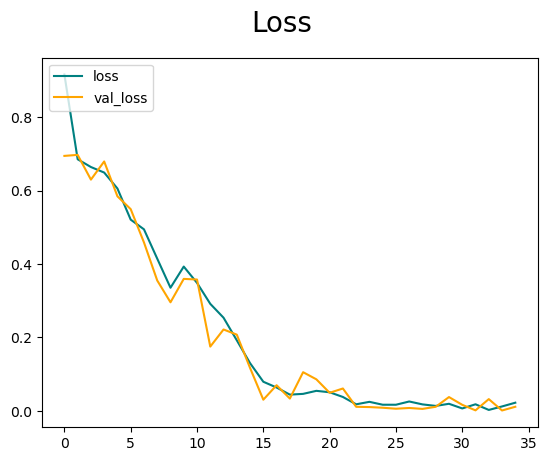

In [117]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

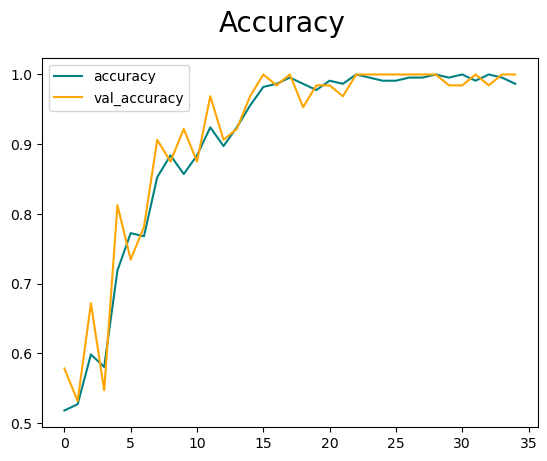

In [118]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [119]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [120]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


2024-06-24 17:49:39.961275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [105]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Saving the Model

In [125]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','happyorsad.keras'))
new_model = load_model('models/happyorsad.keras')
new_model.summary()

/home/mostlyk/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 252, 252, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,406,436 (28.25 MB)

 Trainable params: 3,703,217 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,703,219 (14.13 MB)